In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import backend as K

tf.compat.v1.disable_eager_execution()

model = VGG16(weights='imagenet')

2024-02-11 20:23:29.484752: W tensorflow/c/c_api.cc:305] Operation '{name:'block5_conv3_1/bias/Assign' id:839 op device:{requested: '', assigned: ''} def:{{{node block5_conv3_1/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](block5_conv3_1/bias, block5_conv3_1/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
!wget https://s3.amazonaws.com/book.keras.io/img/ch5/creative_commons_elephant.jpg

--2024-02-11 20:25:15--  https://s3.amazonaws.com/book.keras.io/img/ch5/creative_commons_elephant.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.137.216, 54.231.225.232, 52.217.195.112, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.137.216|:443... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  x-amz-id-2: 8YKMhfrXQDp+BIGRPxUZvtEBQ7Q+nXi/tlwGG9hTr8oV2O5OB9uL4bOKCHujymxgFSsd0blW9pw=
  x-amz-request-id: 13TD09CPZ1GBR7XN
  Date: Sun, 11 Feb 2024 19:25:19 GMT
  Last-Modified: Sat, 02 Sep 2017 20:09:42 GMT
  ETag: "52dd68d4a6ab239b17d3fc809acd2715"
  Accept-Ranges: bytes
  Content-Type: image/jpeg
  Server: AmazonS3
  Content-Length: 190269
Length: 190269 (186K) [image/jpeg]
Saving to: ‘creative_commons_elephant.jpg’

creative_commons_el 100%[===================>] 185.81K   605KB/s    in 0.3s    

2024-02-11 20:25:16 (605 KB/s) - ‘creative_commons_elephant.jpg’ saved [190269/190269]



In [18]:
!wget https://i.stack.imgur.com/zMoo4.jpg

--2024-02-11 20:45:42--  https://i.stack.imgur.com/zMoo4.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 199.232.148.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|199.232.148.193|:443... connected.
HTTP request sent, awaiting response... 
  HTTP/1.1 200 OK
  Connection: keep-alive
  Content-Length: 575619
  Cache-Control: max-age=315360000
  Content-Type: image/jpeg
  ETag: "e01a18398ac7a1e47df887db2350e85e"
  Expires: Thu, 31 Dec 2037 23:55:55 GMT
  Last-Modified: Wed, 10 Oct 2012 16:42:55 GMT
  Via: 1.1 varnish, 1.1 varnish
  Accept-Ranges: bytes
  Date: Sun, 11 Feb 2024 19:45:45 GMT
  Age: 2727985
  X-Served-By: cache-iad-kiad7000111-IAD, cache-ams12724-AMS
  X-Cache: HIT, HIT
  X-Cache-Hits: 157, 1
  X-Timer: S1707680745.421536,VS0,VE1
  Server: cat factory 1.0
Length: 575619 (562K) [image/jpeg]
Saving to: ‘zMoo4.jpg’

zMoo4.jpg           100%[===================>] 562.13K  --.-KB/s    in 0.03s   

2024-02-11 20:45:43 (16.8 MB/s) - ‘zMoo4.jpg’ saved [575619/575619]

![el](./creative_commons_elephant.jpg)

In [19]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# The local path to our target image
img_path = './zMoo4.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [20]:
x

array([[[[125.061    ,  88.221    ,  57.32     ],
         [120.061    ,  83.221    ,  52.32     ],
         [120.061    ,  81.221    ,  50.32     ],
         ...,
         [120.061    ,  81.221    ,  50.32     ],
         [119.061    ,  80.221    ,  49.32     ],
         [117.061    ,  78.221    ,  47.32     ]],

        [[123.061    ,  86.221    ,  55.32     ],
         [120.061    ,  83.221    ,  52.32     ],
         [123.061    ,  84.221    ,  53.32     ],
         ...,
         [119.061    ,  80.221    ,  49.32     ],
         [117.061    ,  78.221    ,  47.32     ],
         [119.061    ,  80.221    ,  49.32     ]],

        [[120.061    ,  83.221    ,  52.32     ],
         [120.061    ,  83.221    ,  52.32     ],
         [124.061    ,  85.221    ,  54.32     ],
         ...,
         [115.061    ,  76.221    ,  45.32     ],
         [119.061    ,  80.221    ,  49.32     ],
         [119.061    ,  80.221    ,  49.32     ]],

        ...,

        [[-51.939003 , -35.779    , -2

In [21]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02342885', 'hamster', 0.22084787), ('n02486261', 'patas', 0.07710738), ('n02493509', 'titi', 0.04183064)]


In [22]:
np.argmax(preds[0])

333

In [23]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

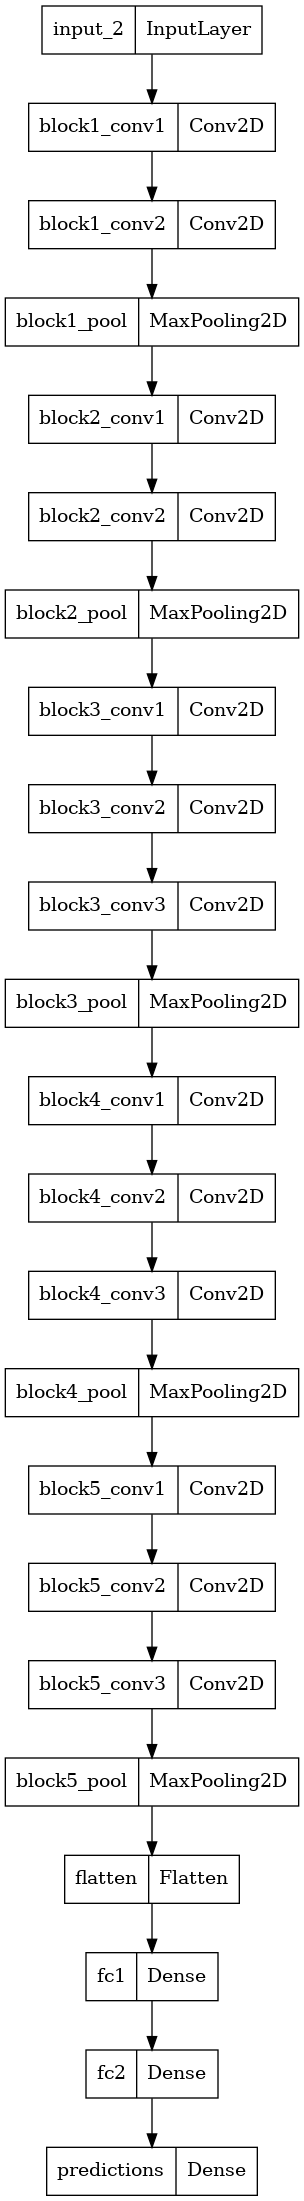

In [13]:
keras.utils.plot_model(model)

In [24]:
# This is the "african elephant" entry in the prediction vector
african_elephant_output = model.output[:, 333]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model.get_layer('block5_conv3')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (512,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `block5_conv3`,
# given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the elephant class
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

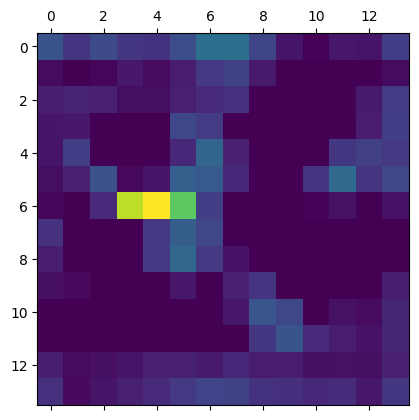

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [26]:
import cv2

# We use cv2 to load the original image
img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4 here is a heatmap intensity factor
superimposed_img = heatmap * 0.4 + img

# Save the image to disk
cv2.imwrite('.zMoo4.jpg', superimposed_img)

True

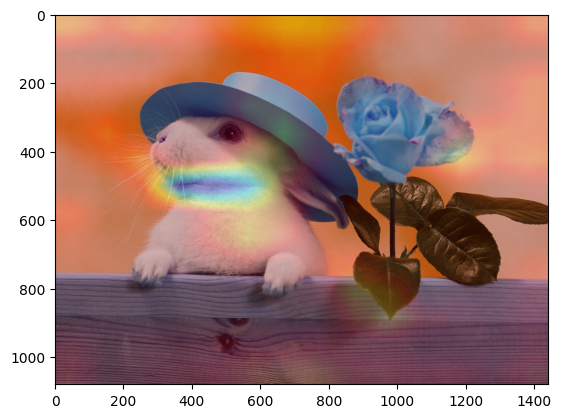

In [27]:
superimposed_img_norm = superimposed_img/max(superimposed_img.flatten())
plt.imshow(superimposed_img_norm)